### Import packages:

In [141]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import svm
#stemming
from nltk.stem.snowball import PorterStemmer
from nltk import word_tokenize

from nltk.stem.snowball import SnowballStemmer

### Set up plot styles:

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load data:

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
reviews = pd.read_csv('./imdb250.csv')
reviews_ = pd.read_csv('./imdb2016.csv')
reviews = reviews.append(reviews_,ignore_index=True)
reviews.dropna(subset=['rating', 'review_text'], how='any', inplace=True) #delete useless
reviews['category'] = reviews['rating'].map(lambda x: 0 if x < 6 else 1 ,list(reviews.rating))
reviews.head()

,author,author_id,date,movie_id,movie_name,numOfReviews,rating,region,review_id,review_name,review_text,useful,useful_of,category
0,carflo,NaN,26 November 2003,tt0111161,The Shawshank Redemption,4857,10.0,Texas,349418,Tied for the best movie I have ever seen,why do i want to write the 234th comment on t...,2275.0,2611.0,1
1,Wesley S. Walker,NaN,27 August 2002,tt0111161,The Shawshank Redemption,4857,10.0,"Paducah, KY",349147,Shawshank Redeems Hollywood,"can hollywood, usually creating things for e...",1467.0,1712.0,1
3,Justin M (kaspen12),NaN,10 February 2006,tt0111161,The Shawshank Redemption,4857,10.0,"Vancouver, Canada",1288098,A classic piece of unforgettable film-making.,"in its oscar year, shawshank redemption (writ...",896.0,1015.0,1
5,Si Cole,NaN,3 August 2001,tt0111161,The Shawshank Redemption,4857,8.0,NaN,348829,The best story ever told on film,i believe that this film is the best story e...,891.0,1205.0,1
6,Thomas McFadden (tmac4),NaN,25 July 2001,tt0111161,The Shawshank Redemption,4857,10.0,"Houston, Texas",348821,Powerful,one of my all time favorites. shawshank rede...,706.0,859.0,1


In [266]:
reviews['stemmed'] = reviews[:].review_text.map(lambda x: ' '.join([stemmer.stem(y) for y in x.decode('utf-8').split(' ')]))


### Rating distribution:

(array([  32779.,   13764.,   15588.,   14504.,   19817.,   22741.,
          30354.,   45623.,   62202.,  144984.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

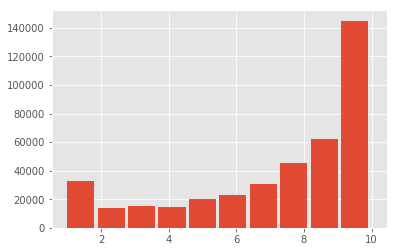

In [269]:
plt.hist(reviews.rating, width=0.8)

### Choice data randomly to have uniform distribution:

In [267]:
reviews.to_csv()

,author,author_id,date,movie_id,movie_name,numOfReviews,rating,region,review_id,review_name,review_text,useful,useful_of,category,stemmed
0,carflo,NaN,26 November 2003,tt0111161,The Shawshank Redemption,4857,10.0,Texas,349418,Tied for the best movie I have ever seen,why do i want to write the 234th comment on t...,2275.0,2611.0,1,whi do i want to write the 234th comment on t...
1,Wesley S. Walker,NaN,27 August 2002,tt0111161,The Shawshank Redemption,4857,10.0,"Paducah, KY",349147,Shawshank Redeems Hollywood,"can hollywood, usually creating things for e...",1467.0,1712.0,1,"can hollywood, usual creat thing for enterta..."
3,Justin M (kaspen12),NaN,10 February 2006,tt0111161,The Shawshank Redemption,4857,10.0,"Vancouver, Canada",1288098,A classic piece of unforgettable film-making.,"in its oscar year, shawshank redemption (writ...",896.0,1015.0,1,"in it oscar year, shawshank redempt (written ..."
5,Si Cole,NaN,3 August 2001,tt0111161,The Shawshank Redemption,4857,8.0,NaN,348829,The best story ever told on film,i believe that this film is the best story e...,891.0,1205.0,1,i believ that thi film is the best stori eve...
6,Thomas McFadden (tmac4),NaN,25 July 2001,tt0111161,The Shawshank Redemption,4857,10.0,"Houston, Texas",348821,Powerful,one of my all time favorites. shawshank rede...,706.0,859.0,1,one of my all time favorites. shawshank rede...
7,Tim Cox,NaN,25 March 1999,tt0111161,The Shawshank Redemption,4857,10.0,"Marietta, OH",348222,The Shawshank Redemption,one of the finest films made in recent years...,672.0,830.0,1,one of the finest film made in recent years....
8,Dan Grant (dan.grant@bell.ca),NaN,13 July 1999,tt0111161,The Shawshank Redemption,4857,10.0,"Toronto, Ontario",348302,Stephen King's best adapted movie,misery and stand by me were the best adaptati...,598.0,728.0,1,miseri and stand by me were the best adapt up...
9,alexkolokotronis,NaN,18 February 2008,tt0111161,The Shawshank Redemption,4857,10.0,"Queens, New York",1822343,This is How Movies Should Be Made,this movie is not your ordinary hollywood fli...,468.0,541.0,1,thi movi is not your ordinari hollywood flick...
10,Thomas Peluso (tpeluso@gmail.com),NaN,6 September 2000,tt0111161,The Shawshank Redemption,4857,10.0,"Long Island, NY",348616,Simply amazing. The best film of the 90's.,the shawshank redemption is without a doubt ...,543.0,696.0,1,the shawshank redempt is without a doubt one...
11,chad millar,NaN,6 February 1999,tt0111161,The Shawshank Redemption,4857,10.0,"Madison, WI",349059,"Simply known as ""The Movie""",whenever i talk about this movie with my fri...,385.0,474.0,1,whenev i talk about thi movi with my friends...


In [270]:
S = np.argsort(reviews.rating.value_counts().index)
ratingCounts = reviews.rating.value_counts().values[S]
proba = map(lambda x: 1.0/x, ratingCounts)
print proba
row_proba = map(lambda x: proba[int(x)-1], reviews.rating)
row_proba /= sum(row_proba)
idx = (np.random.choice(reviews.index, size=100000, replace=False, p=row_proba))
reviewsNormed = reviews.loc[idx,:]

[3.0507337014551999e-05, 7.2653298459750076e-05, 6.4151911726969464e-05, 6.8946497517926095e-05, 5.0461724781753044e-05, 4.39734400422145e-05, 3.2944587204322332e-05, 2.1918769041930604e-05, 1.6076653483810809e-05, 6.89731280693042e-06]


(array([ 10389.,   8211.,   8679.,   8383.,   9355.,   9761.,  10389.,
         11163.,  11412.,  12258.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

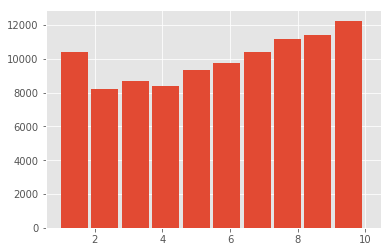

In [271]:
plt.hist(reviewsNormed.rating, width=0.8)

### Categorize: Positive (>7) or Negative (<4)

In [250]:
#train set, get only good(8-10) or bad(1-3)
trainSet = reviewsNormed.iloc[0:10000]
trainSet = trainSet.loc[:,['rating', 'review_text', 'category']]

trainSet.drop(trainSet[(trainSet.rating < 8) & (trainSet.rating > 3)].index, inplace=True)
trainSet = trainSet.loc[:,['review_text','category']]

In [251]:
trainSet.head()

,review_text,category
327586,"in my opinion, this show started great with a...",0
93953,(minor spoilers inasmuch as i mention some v...,1
315549,i imagine this 9.2 rating will drop considera...,0
226154,"of course there is a different saying, some o...",1
225777,"turgid, sloooooow, glacier-like pace. not hel...",0


### Text stemming:

In [254]:
stemmer = PorterStemmer()
reviewsNormed['stemmed'] = reviewsNormed[:].review_text.map(lambda x: ' '.join([stemmer.stem(y) for y in x.decode('utf-8').split(' ')]))
reviewsNormed.head()

,author,author_id,date,movie_id,movie_name,numOfReviews,rating,region,review_id,review_name,review_text,useful,useful_of,category,stemmed
327586,Diego Berges,ur65663908,25 May 2016,tt3107288,"""The Flash""",407,1.0,United States,3475934,"Second season: awful script, acting and contin...","in my opinion, this show started great with a...",48.0,65.0,0,"in my opinion, thi show start great with a su..."
433033,Ruthazel,ur42218268,5 August 2017,tt4786824,"""The Crown""",92,5.0,Netherlands,3772652,"""The Crown"" ; lots of dramatic music involved",seen the first 3 parts of the series. i have ...,0.0,2.0,0,seen the first 3 part of the series. i have t...
93953,Chris_Docker,NaN,20 August 2004,tt0364569,Oldboy,848,8.0,United Kingdom,921576,"Before the opening titles, a few nice gut-thum...",(minor spoilers inasmuch as i mention some v...,11.0,83.0,1,(minor spoiler inasmuch as i mention some vi...
315549,Ronnie Steele,ur37133035,25 April 2015,tt3322312,"""Daredevil""",448,1.0,Canada,3226668,Boring and low budget,i imagine this 9.2 rating will drop considera...,32.0,69.0,0,i imagin thi 9.2 rate will drop consider in t...
226154,kosmasp,ur5876717,8 June 2017,tt4034228,Manchester by the Sea,582,9.0,NaN,3725957,Life is a ... sea(?),"of course there is a different saying, some o...",0.0,3.0,1,"of cours there is a differ saying, some of yo..."


### Text vectorize:

In [257]:
vectorizer = TfidfVectorizer(min_df=0.0, max_df=1, binary=False, ngram_range=(1,1))

idx = range(100000)
np.random.shuffle(idx)
reviewsNormed = reviewsNormed.iloc[idx]

X_train_Stemmed = reviewsNormed[0:90000].stemmed
X_test_Stemmed = reviewsNormed[90000:100000].stemmed

X_train = vectorizer.fit_transform(X_train_Stemmed)
X_test = vectorizer.transform(X_test_Stemmed)

y_train = reviewsNormed.iloc[0:90000].rating
y_test = reviewsNormed.iloc[90000:100000].rating

idf = vectorizer.idf_
feature_mapping = np.array(vectorizer.get_feature_names())

#лемматизация, стемминг
#график document frequency
#фактаризационная машина (libfm)

In [260]:
idx_max = np.argsort(idf)
feature_mapping[idx_max]
idx_max.shape

(1815L,)

# Linear prediction

In [243]:
#linear regression
regression = LinearRegression()
regression.fit(X_train, y_train)
y_linPredict = regression.predict(X_test)

In [244]:
y_test.value_counts()

1.0     106
4.0     104
7.0     104
5.0     103
6.0     103
9.0     101
3.0     100
8.0      97
2.0      96
10.0     86
Name: rating, dtype: int64

1.672
1.33798587668


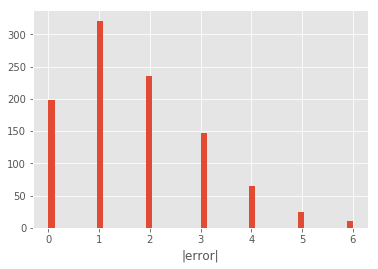

In [245]:
error_ = abs(y_linPredict.round() - y_test)
print (error_).mean()
print error_.std()

plt.hist(error_, bins=50)
plt.xlabel('|error|')
plt.show()
#mse
#auc - binary

## The Best and the worst

In [197]:
coef = np.array(regression.coef_)
feature_mapping = np.array(vectorizer.get_feature_names())

In [198]:
idx = np.argsort(coef)

In [199]:
coef[idx]

array([-20.58718991, -18.65292613, -11.27343732, ...,  29.80498121,
        36.6061492 ,  48.05443769])

In [200]:
feature_mapping = feature_mapping[idx]
feature_mapping

array([u'movie score', u'score because', u'worst', ..., u'my grade',
       u'one word', u'books this'],
      dtype='<U28')

In [204]:
#the best
feature_mapping[-100:]

array([u'traits', u'waiting on', u'can pick', u'bed and', u'is drawn',
       u'best', u'canceled because', u'brilliant', u'significantly',
       u'end have', u'be here', u'not lot', u'great job',
       u'subtitles were', u'spectrum', u'had nothing', u'also can',
       u'gotten better', u'their humanity', u'very stupid',
       u'from episode', u'criticism', u'went by', u'been said',
       u'really beautiful', u'wall is', u'reported', u'time movie',
       u'no name', u'this stunning', u'love this', u'show series',
       u'isn for', u'one', u'like 10', u'complain', u'edward norton',
       u'such beautiful', u'tour is', u'staggering', u'crime but',
       u'hooked', u'you laughing', u'episode as', u'interviews with',
       u'negative comments', u'that expected', u'tremendous',
       u'extended edition', u'nice guys', u'great visuals', u'is show',
       u'troops and', u'film give', u'boring there', u'cbs', u'cry',
       u'andy', u'the psychology', u'tv the', u'great', u'word',


In [202]:
#the worst
feature_mapping[:100]

array([u'movie score', u'score because', u'worst', u'flattest', u'boring',
       u'awful', u'can sum', u'pathetic', u'two stars', u'macgyver',
       u'10 just', u'worst movies', u'waste', u'screenwriting',
       u'have decent', u'terrible', u'don recommend', u'my younger',
       u'lacks', u'anymore this', u'dumb', u'word for', u'paid to',
       u'poor', u'disappointment', u'worst movie', u'dreadful', u'crap',
       u'worse', u'word to', u'senseless', u'dumb that', u'sorry',
       u'cant be', u'really fantastic', u'atrocious', u'opposite of',
       u'film up', u'very disappointing', u'etc as', u'so rented',
       u'misused', u'most boring', u'non believable', u'review when',
       u'unfortunately', u'history this', u'when will', u'the masterpiece',
       u'not even', u'be canceled', u'lost my', u'no entertainment',
       u'glitter', u'rewriting', u'unsympathetic', u'filth', u'fails',
       u'hip', u'but director', u'twice now', u'disappointed', u'zero',
       u'll stick', 